In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#plt.rcParams['font.family'] = 'Arial'


In [118]:
df_i=pd.read_csv( '/Users/saisashankyalamarthi/Desktop/social media influencers - instagram sep-2022.csv')

In [119]:
#tiktok analysis 
df_i.head(3)

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement\n,Engagement average\r\n,Category_1,Category_2,sales_from_marketing
0,1,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN,47790000
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling,36810000
2,3,arianagrande,Ariana Grande,329.6M,United States,2.9M,4M,NaN,NaN,32960000


In [120]:
df_i.isnull().any().count # checking if there is any missing data 

<bound method Series.count of S.no                      False
Instagram name            False
 Name                      True
Subscribers               False
Audience country           True
Authentic engagement\n    False
Engagement average\r\n    False
Category_1                 True
Category_2                 True
sales_from_marketing      False
dtype: bool>

In [121]:
df_i.isnull().any() # checking if there is any missing data 
df_i.replace([np.inf, -np.inf], np.nan, inplace=True)
df_i.dropna(inplace=True)
df_i.isnull().any() # after cleaning check 

S.no                      False
Instagram name            False
 Name                     False
Subscribers               False
Audience country          False
Authentic engagement\n    False
Engagement average\r\n    False
Category_1                False
Category_2                False
sales_from_marketing      False
dtype: bool

In [122]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [123]:
def change(df,list1):
    for i in list1:
        df['new'+i]=df[i].apply(convert)
        df['new'+i]=df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df

In [124]:
df_i.columns

Index(['S.no', 'Instagram name', ' Name', 'Subscribers', 'Audience country',
       'Authentic engagement\n', 'Engagement average\r\n', 'Category_1',
       'Category_2', 'sales_from_marketing'],
      dtype='object')

In [125]:
df_i.describe()

,S.no,sales_from_marketing
count,246.000000,2.460000e+02
mean,570.016260,2.816789e+06
std,296.280217,5.356427e+06
min,2.000000,3.000000e+05
25%,320.750000,8.850000e+05
50%,614.500000,1.370000e+06
75%,844.750000,2.310000e+06
max,997.000000,3.681000e+07


In [126]:
df_i.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'},axis=1,inplace=True)
df_i.rename({'Authentic engagement\n':'Authentic engagement','Engagement average\r\n':'Engagement average'},axis=1,inplace=True)

In [127]:
df_i.head(2)

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement,Engagement average,Category_1,Category_2,sales_from_marketing
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling,36810000
3,4,leomessi,Leo Messi,358.6M,Indonesia,2.7M,3.5M,Sports with a ball,Family,35860000


In [128]:
df_i.drop_duplicates(subset=['Instagram name'],inplace=True)

In [129]:
df_i.shape

(230, 10)

In [130]:
df_i.drop(labels=['Instagram name','Authentic engagement'],axis=1,inplace=True)
df_i.head(2)

,S.no,Name,Subscribers,Audience country,Engagement average,Category_1,Category_2,sales_from_marketing
1,2,Kylie 🤍,368.1M,United States,5.5M,Fashion,Modeling,36810000
3,4,Leo Messi,358.6M,Indonesia,3.5M,Sports with a ball,Family,35860000


In [131]:
li=['Subscribers','Engagement average']
change(df_i,li)

,S.no,Name,Subscribers,Audience country,Engagement average,Category_1,Category_2,sales_from_marketing,newSubscribers,newEngagement average
1,2,Kylie 🤍,368.1M,United States,5.5M,Fashion,Modeling,36810000,368100000.0,5500000.0
3,4,Leo Messi,358.6M,Indonesia,3.5M,Sports with a ball,Family,35860000,358600000.0,3500000.0
4,5,Zendaya,151.1M,United States,5.8M,Cinema & Actors/actresses,Fashion,15110000,151100000.0,5800000.0
10,11,Kim Kardashian,329.8M,United States,1.6M,Fashion,Beauty,32980000,329800000.0,1600000.0
20,21,Kendall,255.4M,United States,1.3M,Modeling,Fashion,25540000,255400000.0,1300000.0
...,...,...,...,...,...,...,...,...,...,...
979,980,Tejasswi Prakash,6.3M,India,376.7K,Fashion,Beauty,630000,6300000.0,376700.0
980,981,Shahin Samad poor شاهین صمدپور,4.7M,Iran,475.9K,Literature & Journalism,Cinema & Actors/actresses,470000,4700000.0,475900.0
984,985,Mario Casas,7M,Spain,311K,Modeling,Cinema & Actors/actresses,700000,7000000.0,311000.0
986,987,Jeremy Renner,17.9M,United States,119.3K,Shows,Cinema & Actors/actresses,1790000,17900000.0,119300.0


In [132]:
#Engagement Rate formula:  ER=(Engagement Average/total Followers)*100

In [133]:
df_i['Engagement Rate']=np.round((df_i['newEngagement average']/df_i['newSubscribers'])*100,3)
#print(df_i['newSubscribers'].str[-1].unique())
print(df_i['newSubscribers'].astype(str).str[-1].unique())


['0' '7' '2' '1' '4']


In [134]:
# for convenice 
df_i['newSubscribers']=df_i['newSubscribers']/1000000

In [135]:
df_i.drop(labels=['Engagement average','newEngagement average'],axis=1,inplace=True)
df_i.head(5)

,S.no,Name,Subscribers,Audience country,Category_1,Category_2,sales_from_marketing,newSubscribers,Engagement Rate
1,2,Kylie 🤍,368.1M,United States,Fashion,Modeling,36810000,368.1,1.494
3,4,Leo Messi,358.6M,Indonesia,Sports with a ball,Family,35860000,358.6,0.976
4,5,Zendaya,151.1M,United States,Cinema & Actors/actresses,Fashion,15110000,151.1,3.839
10,11,Kim Kardashian,329.8M,United States,Fashion,Beauty,32980000,329.8,0.485
20,21,Kendall,255.4M,United States,Modeling,Fashion,25540000,255.4,0.509


In [136]:
#top15
df_i.sort_values(by='newSubscribers',ascending=False,ignore_index=True).iloc[0:250,[0,1,3,-1]]

,S.no,Name,Audience country,Engagement Rate
0,2,Kylie 🤍,United States,1.494
1,4,Leo Messi,Indonesia,0.976
2,38,Dwayne Johnson,India,0.142
3,11,Kim Kardashian,United States,0.485
4,42,Khloé Kardashian,United States,0.186
...,...,...,...,...
225,850,Maitreyi Ramakrishnan,Brazil,18.687
226,945,Hakken 八犬,United States,16.903
227,968,TommyInnit,France,18.297
228,852,Priyanka Mohan,India,22.043


In [137]:
# Separating X and y
X = df_i.drop('Engagement Rate', axis=1)
y = df_i['Engagement Rate']

In [138]:
import sweetviz as sv
analyze_report = sv.analyze(df_i)
analyze_report.show_html('analyze.html', open_browser=True)

                                             |      | [  0%]   00:00 -> (? left)

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



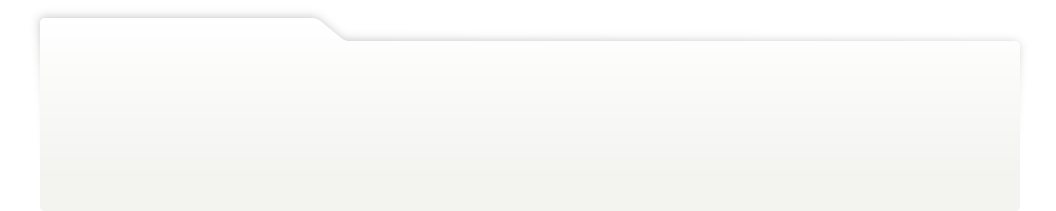
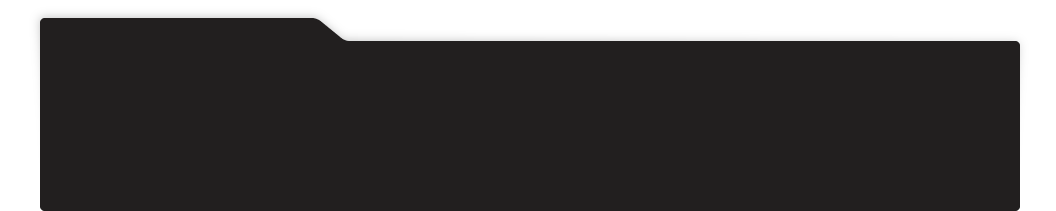
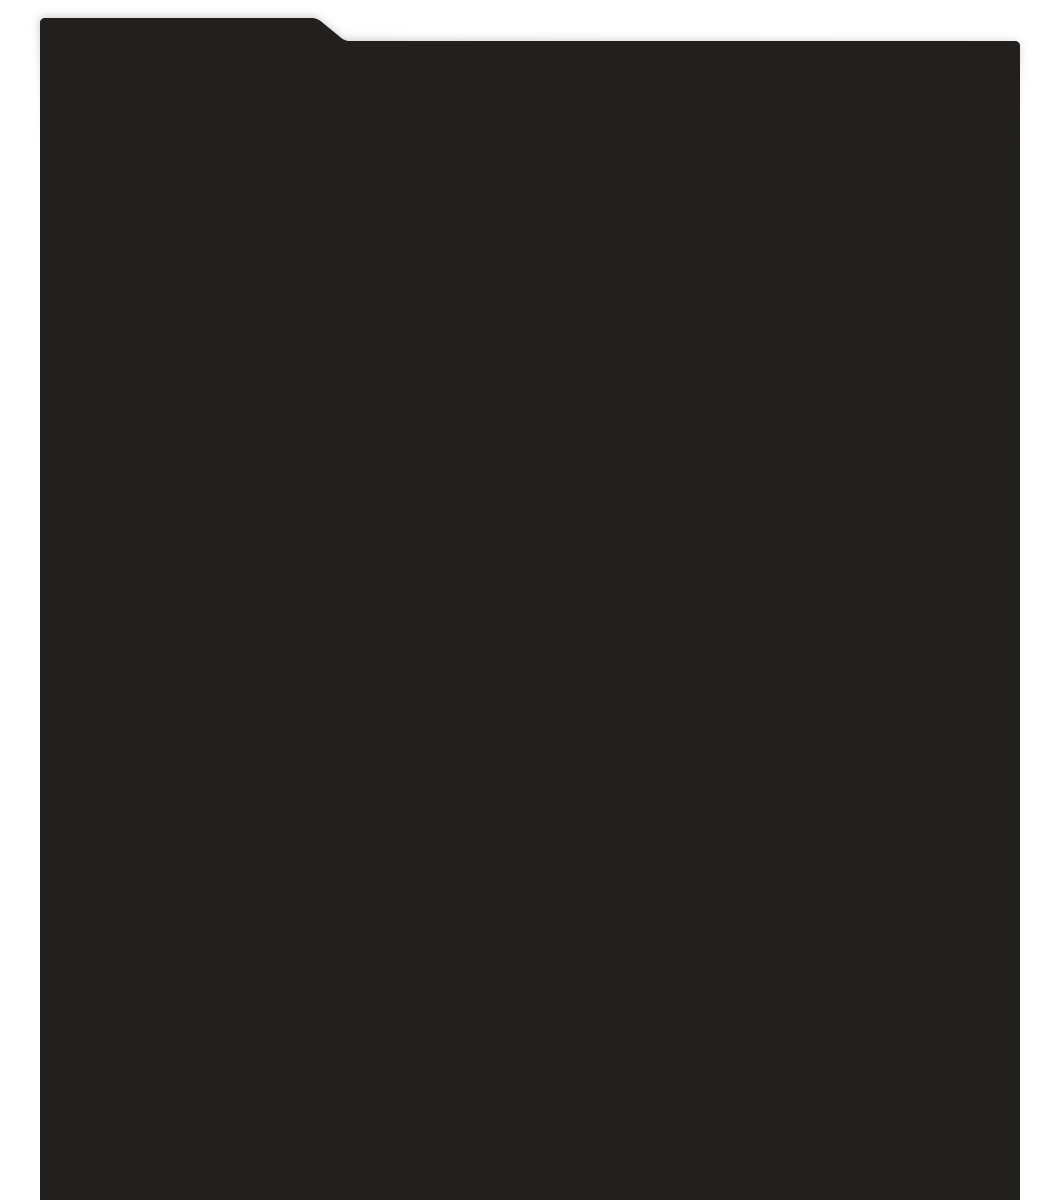
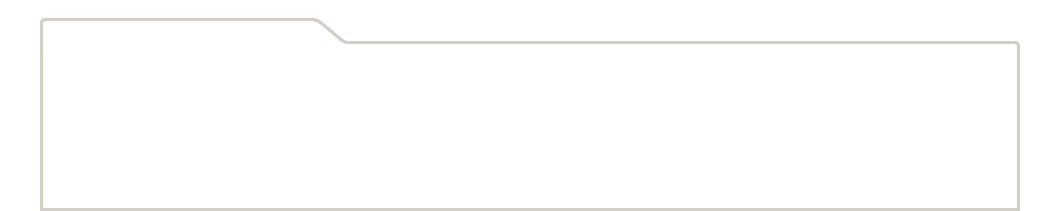
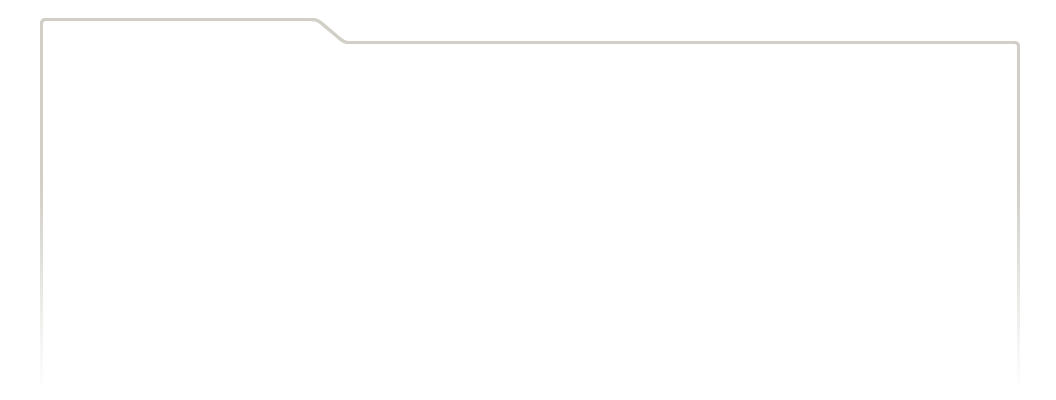
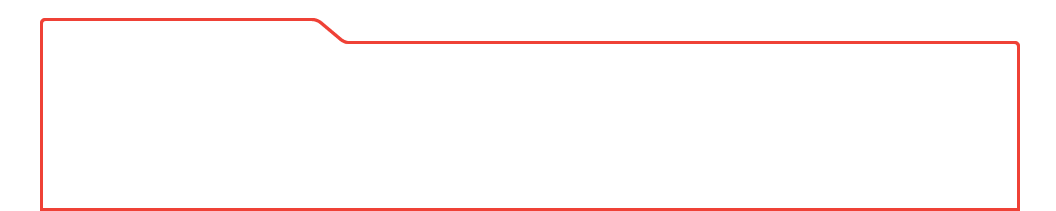
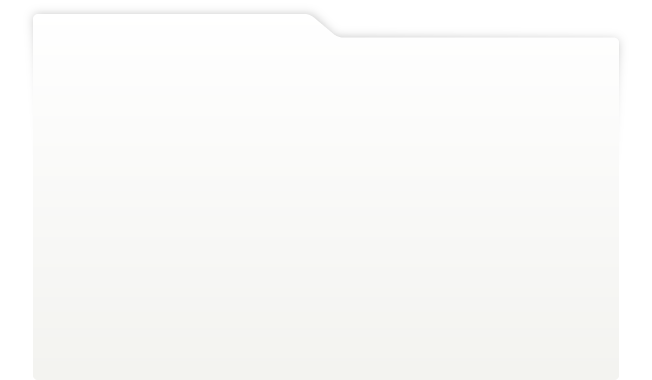
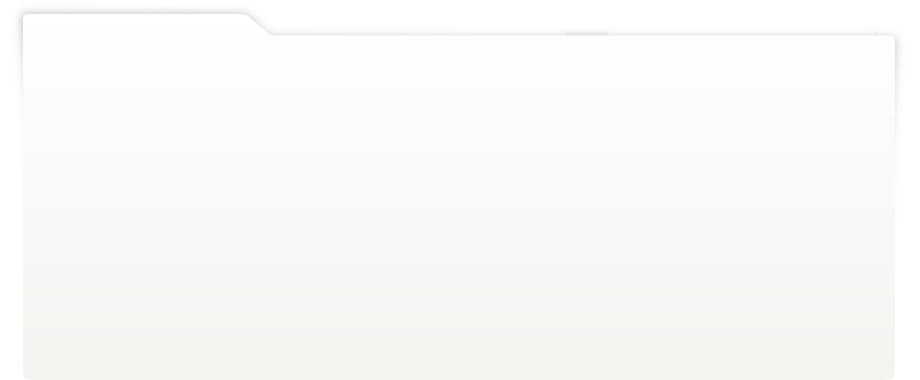
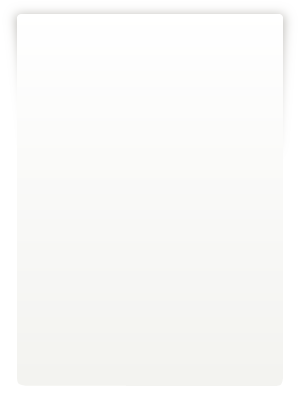
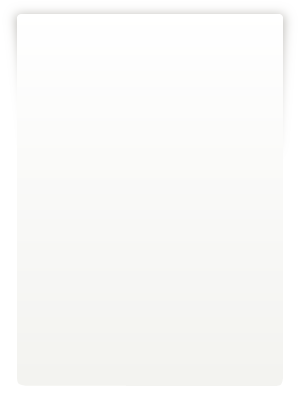
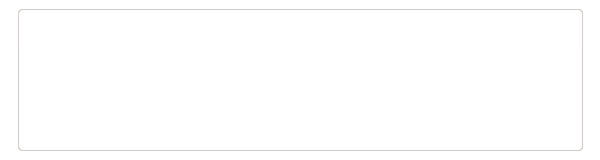
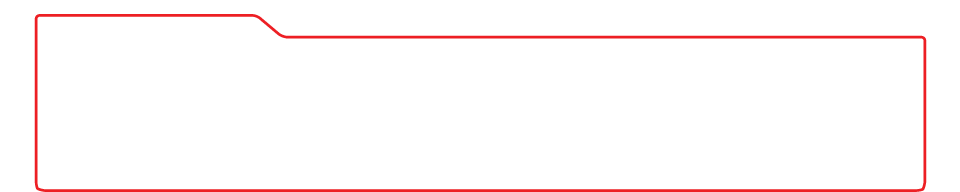
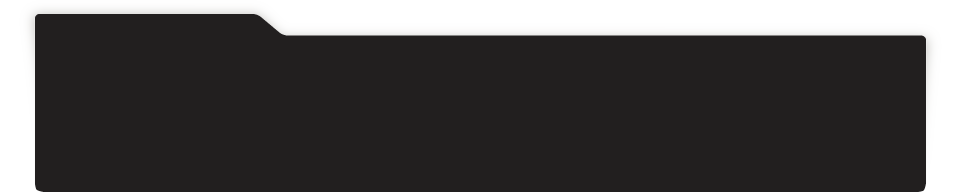
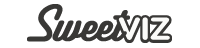
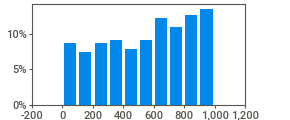
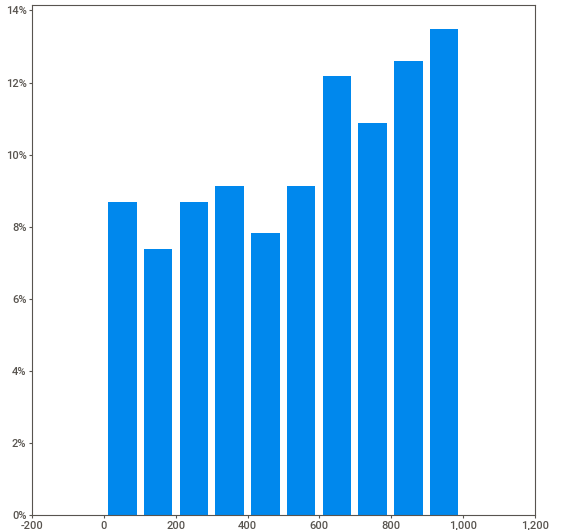
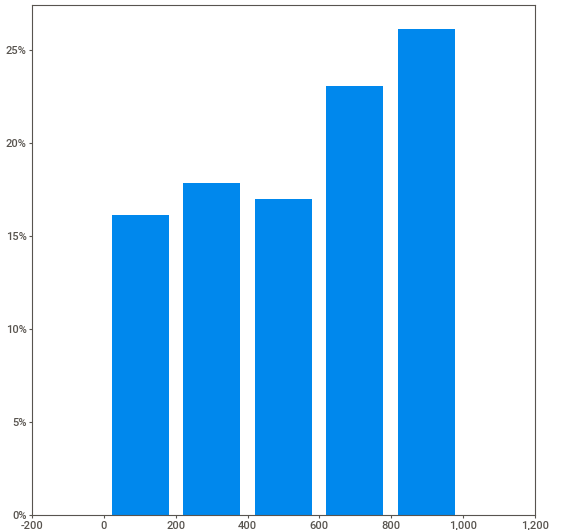
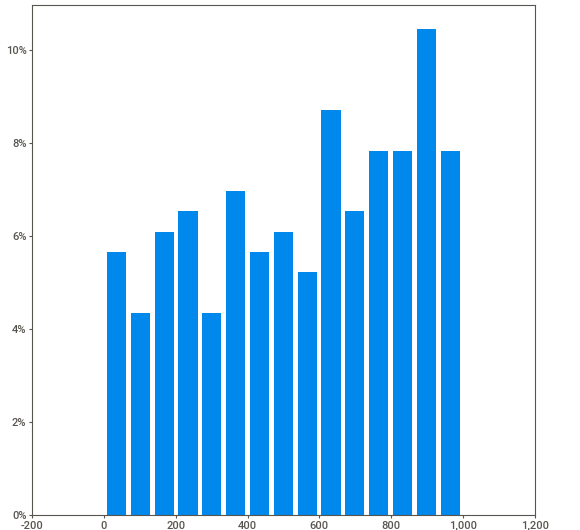
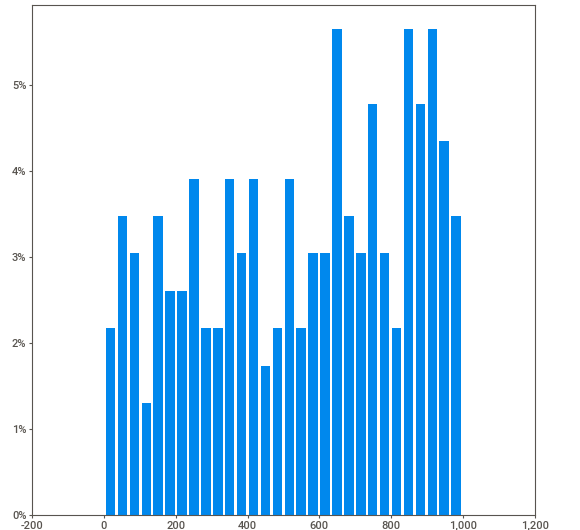
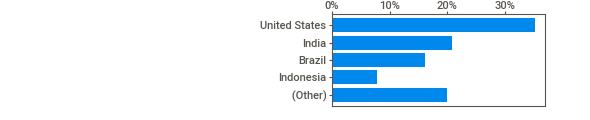
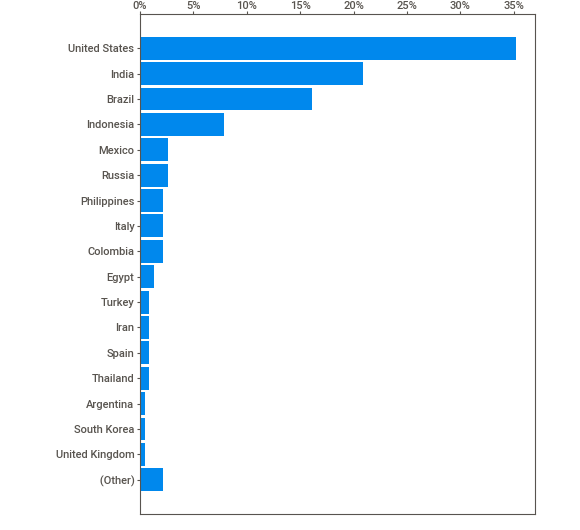
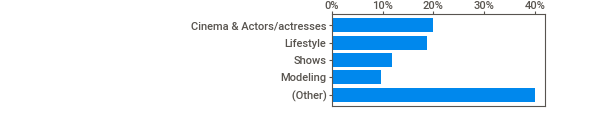
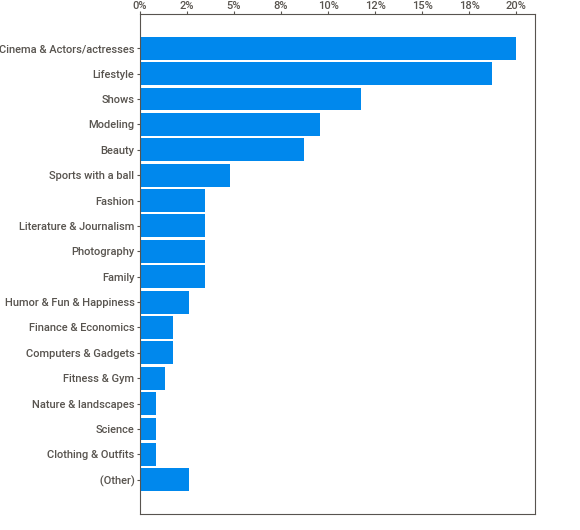
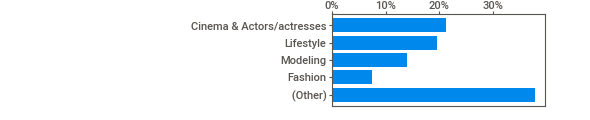
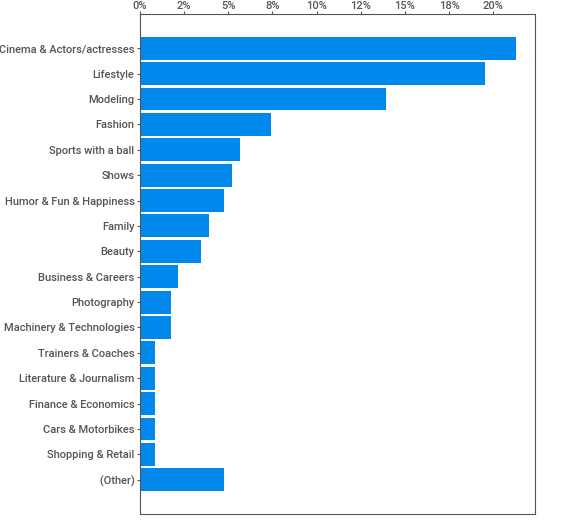
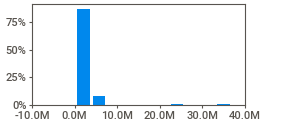
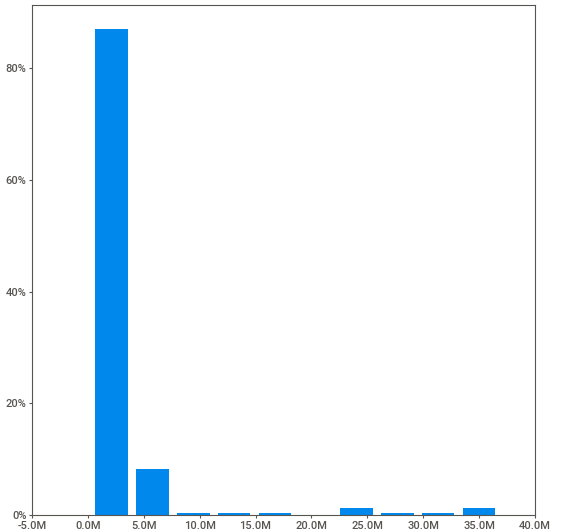
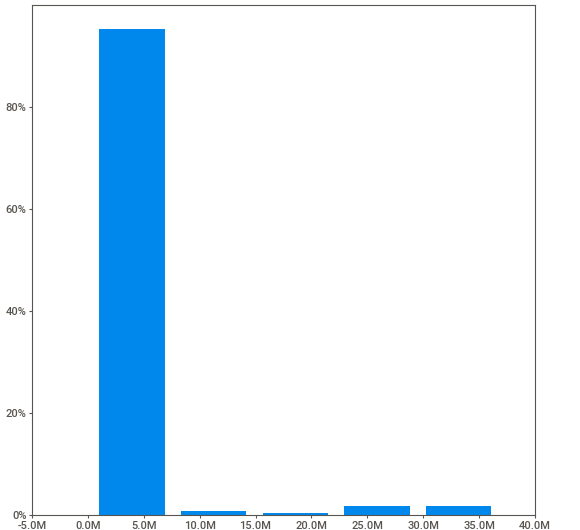
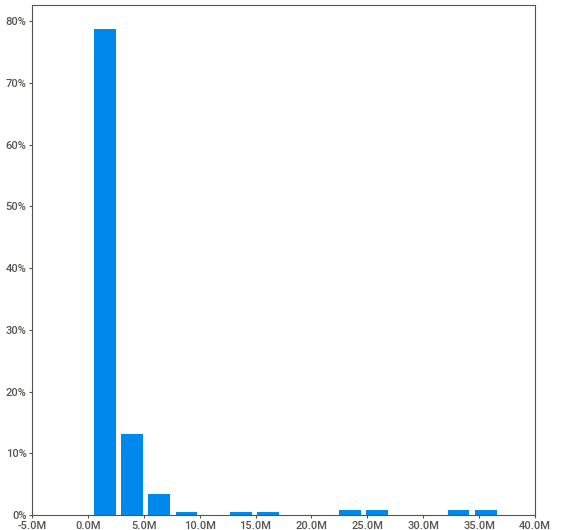
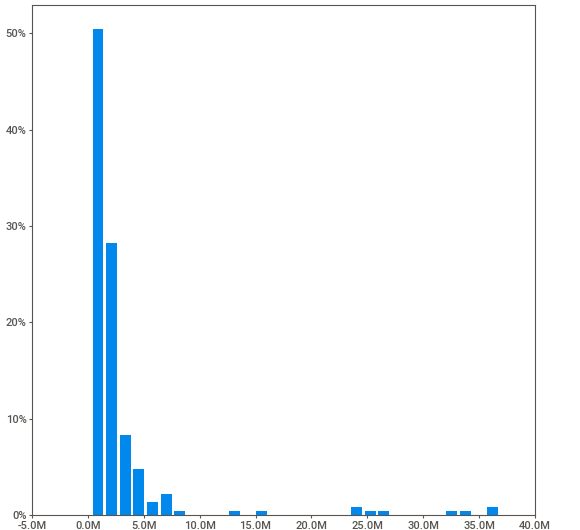
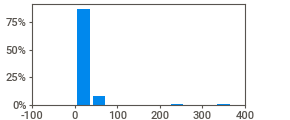
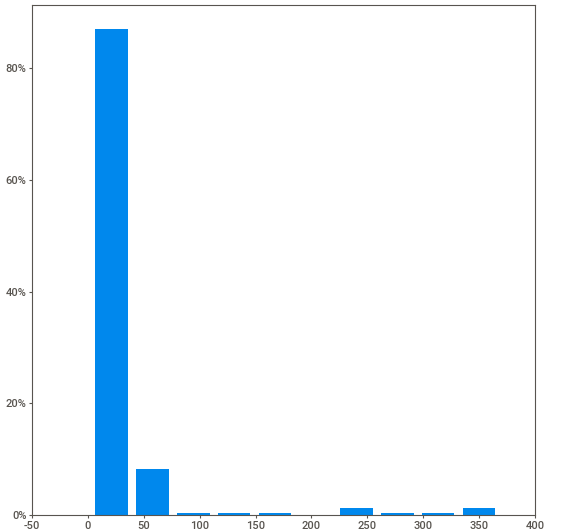
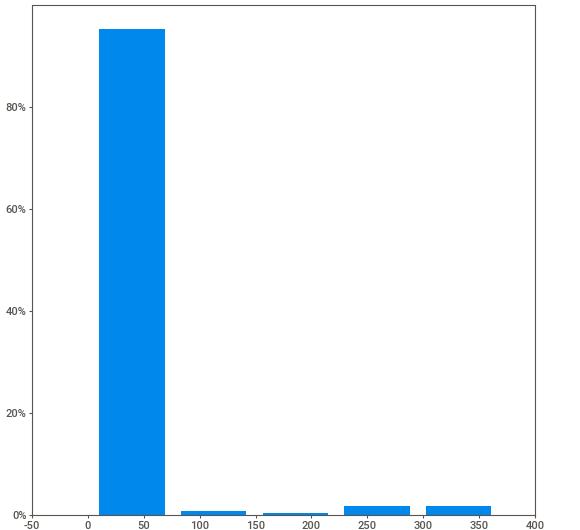
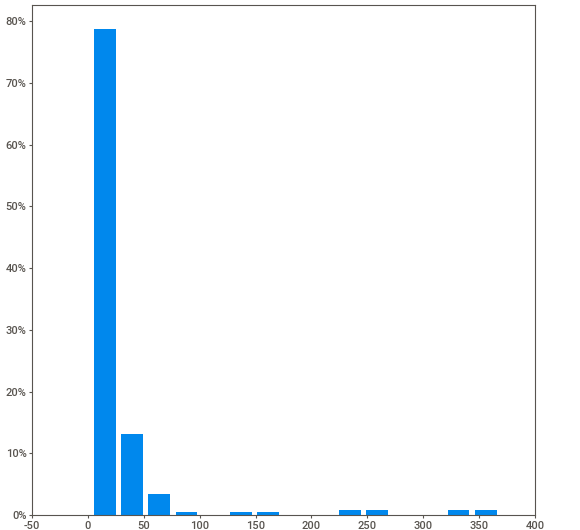
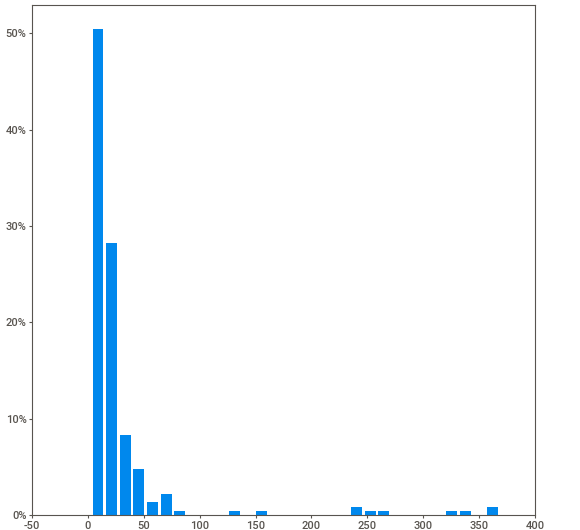
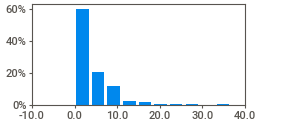
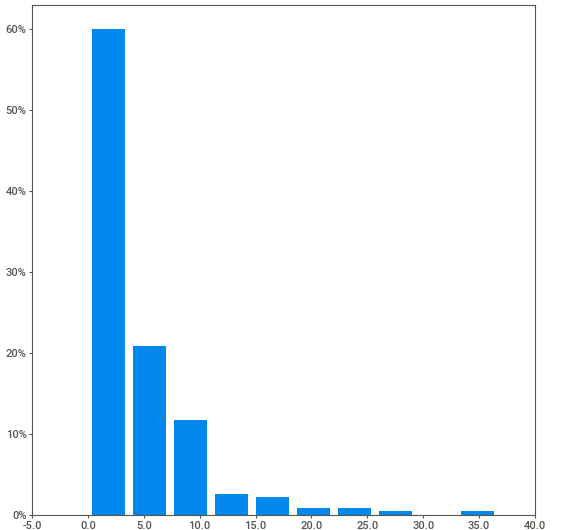
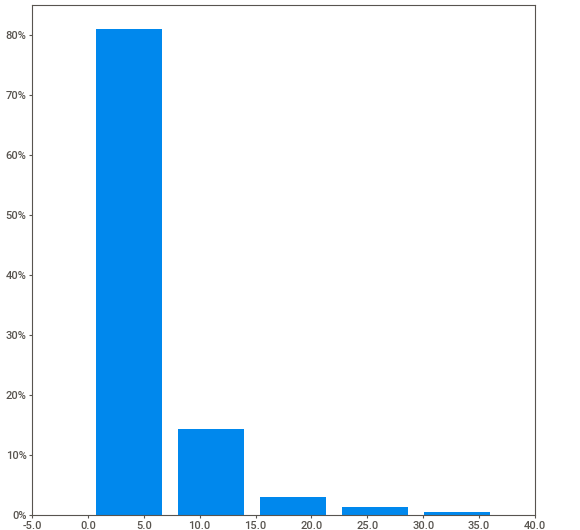
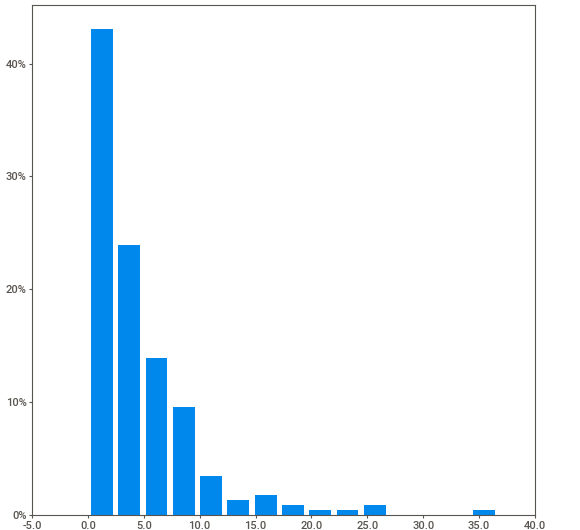
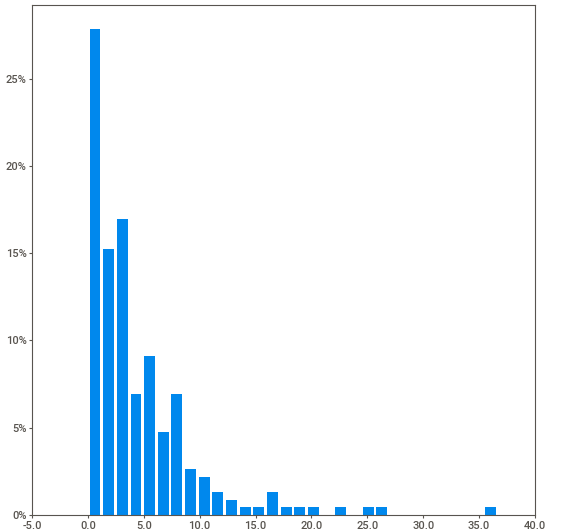
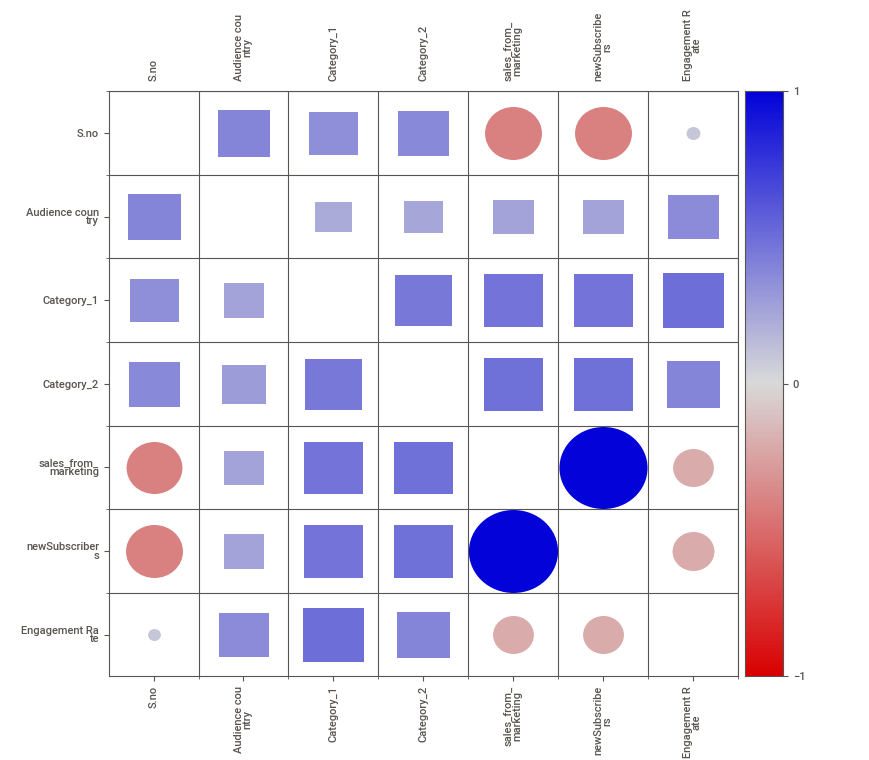
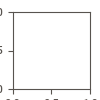

In [25]:
import IPython
IPython.display.HTML('analyze.html')


In [139]:
df_i.head(2)

,S.no,Name,Subscribers,Audience country,Category_1,Category_2,sales_from_marketing,newSubscribers,Engagement Rate
1,2,Kylie 🤍,368.1M,United States,Fashion,Modeling,36810000,368.1,1.494
3,4,Leo Messi,358.6M,Indonesia,Sports with a ball,Family,35860000,358.6,0.976


In [140]:
df_i.columns

Index(['S.no', ' Name', 'Subscribers', 'Audience country', 'Category_1',
       'Category_2', 'sales_from_marketing', 'newSubscribers',
       'Engagement Rate'],
      dtype='object')

In [141]:
# Print the first 5 rows of the dataset
print(df_i.head())



    S.no            Name Subscribers Audience country  \
1      2         Kylie 🤍      368.1M    United States   
3      4       Leo Messi      358.6M        Indonesia   
4      5         Zendaya      151.1M    United States   
10    11  Kim Kardashian      329.8M    United States   
20    21         Kendall      255.4M    United States   

                   Category_1 Category_2  sales_from_marketing  \
1                     Fashion   Modeling              36810000   
3          Sports with a ball     Family              35860000   
4   Cinema & Actors/actresses    Fashion              15110000   
10                    Fashion     Beauty              32980000   
20                   Modeling    Fashion              25540000   

    newSubscribers  Engagement Rate  
1            368.1            1.494  
3            358.6            0.976  
4            151.1            3.839  
10           329.8            0.485  
20           255.4            0.509  


In [142]:
# Check the data types of each column
print(df_i.dtypes)

S.no                      int64
 Name                    object
Subscribers              object
Audience country         object
Category_1               object
Category_2               object
sales_from_marketing      int64
newSubscribers          float64
Engagement Rate         float64
dtype: object


In [143]:
# Get summary statistics of numerical columns
print(df_i.describe())

             S.no  sales_from_marketing  newSubscribers  Engagement Rate
count  230.000000          2.300000e+02      230.000000       230.000000
mean   549.300000          2.947043e+06       29.470435         4.426609
std    291.221597          5.515489e+06       55.154893         5.009376
min      2.000000          3.000000e+05        3.000000         0.027000
25%    302.250000          9.250000e+05        9.250000         1.018500
50%    581.000000          1.495000e+06       14.950000         2.888500
75%    809.000000          2.400000e+06       24.000000         5.932750
max    997.000000          3.681000e+07      368.100000        36.667000


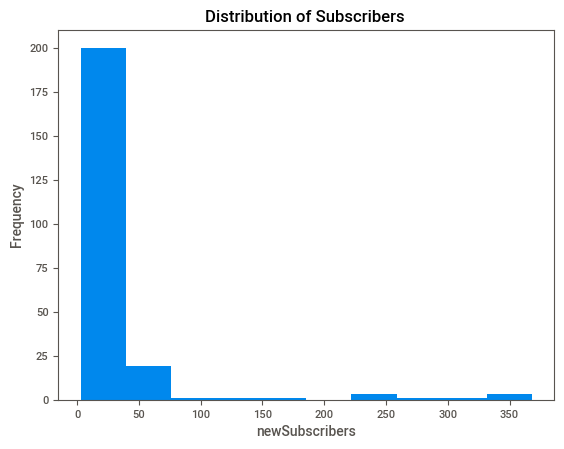

In [144]:
# Plot a histogram of 'followers_in_millions'
plt.hist(df_i['newSubscribers'], bins=10)
plt.xlabel('newSubscribers')
plt.ylabel('Frequency')
plt.title('Distribution of Subscribers ')
plt.show()

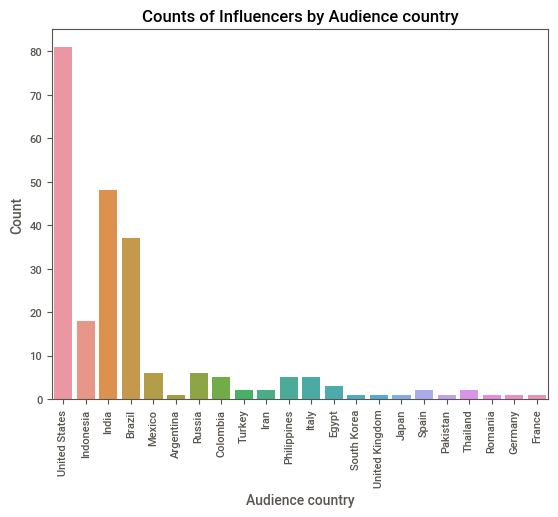

In [145]:
# Plot a bar chart of 'country' counts
sns.countplot(x='Audience country', data=df_i)
plt.xlabel('Audience country')
plt.ylabel('Count')
plt.title('Counts of Influencers by Audience country')
plt.xticks(rotation=90)
plt.show()

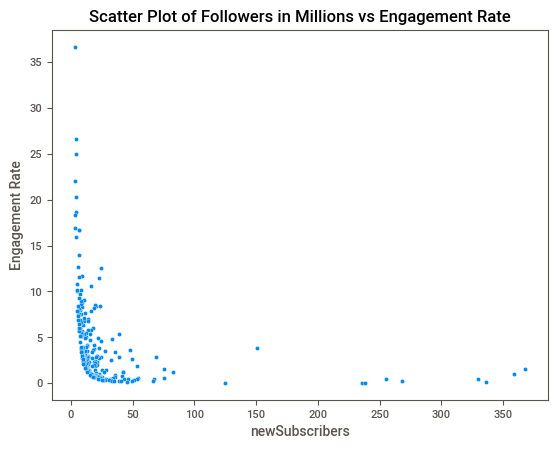

In [146]:
# Plot a scatter plot of 'followers_in_millions' vs 'engagement_avg'
import seaborn as sns
sns.scatterplot(x='newSubscribers', y='Engagement Rate', data=df_i)
plt.xlabel('newSubscribers')
plt.ylabel('Engagement Rate')
plt.title('Scatter Plot of Followers in Millions vs Engagement Rate')
plt.show()

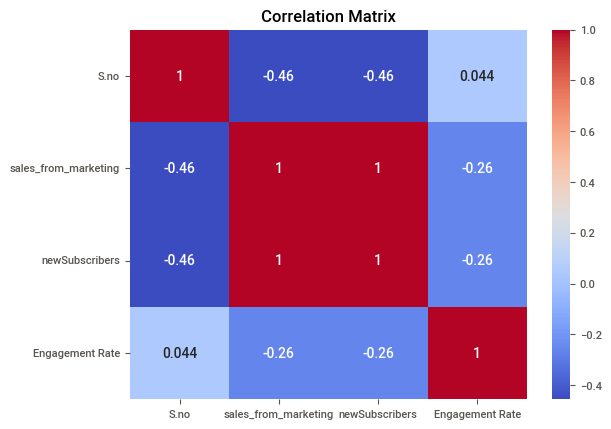

In [147]:
# Calculate and plot the correlation matrix
corr = df_i.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category_1')
    df['Category_1'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

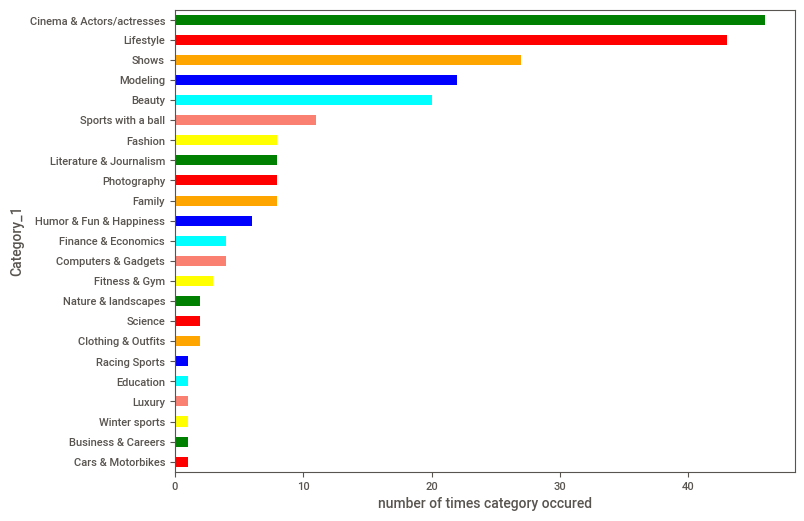

In [45]:
plot(df_i)
    

In [148]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Perform statistical analysis
# Calculate basic statistics
df_stats = df_i.describe()

# Perform correlation analysis
corr = df_i.corr()

# Perform linear regression modeling
# Split the data into predictor variables (X) and target variable (y)
X = df_i[['newSubscribers', 'sales_from_marketing']]
y = df_i['Engagement Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model performance metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Perform multiple linear regression using statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Mean Squared Error (MSE): 17.35084040771432
R-squared (R2) Score: 0.04402123276269154
                            OLS Regression Results                            
Dep. Variable:        Engagement Rate   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     16.66
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           6.18e-05
Time:                        16:47:31   Log-Likelihood:                -688.35
No. Observations:                 230   AIC:                             1381.
Df Residuals:                     228   BIC:                             1388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [149]:
import pandas as pd


# Perform analysis and calculations
# Calculate the average engagement rate for each country
country_engagement_rate = df_i.groupby('Audience country')['Engagement Rate'].mean()

# Calculate the total number of influencers in each region
#region_influencer_count = df['region'].value_counts()

# Calculate the total number of followers for each country
country_follower_count = df_i.groupby('Audience country')['newSubscribers'].sum()

# Calculate the top 5 influencers with the highest engagement rate
top_influencers = df_i.nlargest(5, 'Engagement Rate')

# Generate recommendations for businesses
# Recommend countries with high average engagement rates
top_countries = country_engagement_rate.nlargest(3).index.tolist()

# Recommend regions with high influencer counts
#top_regions = region_influencer_count.nlargest(3).index.tolist()

# Recommend countries with the most followers
top_follower_countries = country_follower_count.nlargest(3).index.tolist()

# Print the recommendations
print("Recommendations for businesses:")
print("1. Focus on influencers from the following countries with high average engagement rates: ", top_countries)
#print("2. Target regions with high influencer counts: ", top_regions)
print("3. Collaborate with influencers from countries with the most followers: ", top_follower_countries)
#print("4. Collaborate with the top 5 influencers with the highest engagement rates:")
#print(top_influencers['country', 'engagement_rate'])
print("4. Collaborate with the top 5 influencers with the highest engagement rates:")
top_influencers = df_i.nlargest(5, 'Engagement Rate')
print(top_influencers[['Audience country', 'Engagement Rate']])


Recommendations for businesses:
1. Focus on influencers from the following countries with high average engagement rates:  ['France', 'South Korea', 'Romania']
3. Collaborate with influencers from countries with the most followers:  ['United States', 'India', 'Brazil']
4. Collaborate with the top 5 influencers with the highest engagement rates:
    Audience country  Engagement Rate
749            India           36.667
510    United States           26.667
553            India           25.000
851            India           22.043
657        Indonesia           20.305
